In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# %%
# Load the data
data = pd.read_excel('Bloodtype.xlsx', sheet_name='表單回應 1')

In [4]:
# %%
# Display basic info
print(f"Dataset shape: {data.shape}")
print("\nFirst few rows:")
data.head()


Dataset shape: (1409, 17)

First few rows:


,時間戳記,"Recommender (Who lead you to this form?)\n\nEach of students is required to have 10 records at least.\nData Collection (10 records:1, 20 records:1.5, 30 records:2, 3: 50 records)",（Class_Label）Blood Types,"\n1 (112021188,Moon Jusung)\nQuestion: Do you believe in God?","2 (112021222, Muhammad Fadhlan Ashila Harashta)\nQuestion: Between the following subjects, which one would you prefer to study?","9 (113021196 , Ariun-Erdene Sodnombayar)\nQuestion: How do you typically deal with stress?","6 (113021192, Yesuijin Batmunkh)\nWhich of the following best describes your typical energy levels throughout the day?","3 (112021223, Mochammad Naufal Ihza Syahzada )\nQuestion: How often do you exercise per week?","13 (113021219, Giandra Raihan Nayottama)\nQuestion: Which type of environment do you feel most comfortable in?","7. (113021194, Chintsogt Enkhbaatar)\nDo you have any allergies?","10. (113021199, Dimas Ahmad Fahreza)\nQuestion: How easily do you get sick?","8 (113021195, Bayarmagnai Munkhbat)\nQuestion: How do you typically react when faced with an unexpected challenge?","11. ( 113021200, GOO-MARAL GANZORIG )\nHow often do mosquitoes bite you compared to others? \n /Please rate your experience based on the following scale/","4 (113021190, Nomin Javkhlanbayar)\nQuestion: What is the color of the veins on your wrist under natural light?","14. (113021220, Radian Try Darmawan)\nQuestion: What's your preferred exercise style? \n","5 (113021191, Chinzorig Battulga)\nIf your life had a soundtrack, which genre would dominate?","12. (113021201, Tselmeg Gantulga)\nWhat type of exercise do you prefer?"
0,2025-03-22 18:47:26.369,113021194 Chintsogt Enkhbaatar,O,No,Mathematics,Taking action to solve the problem,Varies significantly throughout the day (somet...,Never,"A calm, quiet space where I can focus",Yes,"I get sick sometimes, but recover quickly.",Stay calm and analyze the situation,"B) 4-6 → ""Sometimes, but not too often.""",Green or olive,"Low-impact activities (yoga, swimming, walking)",other,NaN
1,2025-03-24 10:35:26.066,113021194 Chintsogt Enkhbaatar,O,No,Mathematics,Talking to someone,"Moderate energy, with occasional fatigue",1-2 times,"A calm, quiet space where I can focus",No,My immune system is unpredictable.,Feel overwhelmed but try to push through,"B) 4-6 → ""Sometimes, but not too often.""",Green or olive,Team or competitive sports,R&B,NaN
2,2025-03-25 09:29:03.749,113021194 Chintsogt Enkhbaatar,A,Yes,Geography,Avoidance or distraction,"Moderate energy, with occasional fatigue",1-2 times,"A calm, quiet space where I can focus",No,I rarely catch colds.,Avoid dealing with it immediately,"B) 4-6 → ""Sometimes, but not too often.""",A mix of blue and green,"High-intensity cardio (running, HIIT)",Jazz,NaN
3,2025-03-25 12:52:20.265,113021192 Yesuijin Batmunkh,B,No,Economy,Taking action to solve the problem,"High energy, rarely fatigued",5+ times,"A busy, high-energy setting with a lot of people",No,I rarely catch colds.,Feel overwhelmed but try to push through,"B) 4-6 → ""Sometimes, but not too often.""",A mix of blue and green,"Low-impact activities (yoga, swimming, walking)",Rap,NaN
4,2025-03-25 12:52:35.649,113021192 Yesuijin Batmunkh,O,Sometimes,Economy,Avoidance or distraction,Varies significantly throughout the day (somet...,3-4 times,"A mix of social and alone time, depending on m...",Yes,"I get sick sometimes, but recover quickly.",Stay calm and analyze the situation,"D) 9-10 → ""All the time! I'm a mosquito magnet!""",A mix of blue and green,Team or competitive sports,R&B,NaN


In [5]:
# %%
# Data cleaning and preprocessing

# Select relevant columns (excluding timestamp and recommender)
feature_columns = data.columns[2:]
target_column = '（Class_Label）Blood Types'

# Drop rows with missing target values
data = data.dropna(subset=[target_column])

# Convert categorical features to numerical
categorical_cols = feature_columns.drop(target_column)
label_encoders = {}

for col in categorical_cols:
    # Skip empty columns
    if data[col].isna().all():
        continue
        
    # Initialize label encoder for each categorical column
    le = LabelEncoder()
    
    # Fill NaN with a special value before encoding
    data[col] = data[col].fillna('MISSING')
    
    # Fit and transform
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
data[target_column] = target_encoder.fit_transform(data[target_column])

In [6]:
# %%
# Prepare features and target
X = data[categorical_cols].fillna(-1)  # Fill any remaining NaN with -1
y = data[target_column]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [12]:
print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (986, 14)
Test set size: (423, 14)


Random Forest Accuracy: 0.2908
Random Forest F1 Score: 0.2839


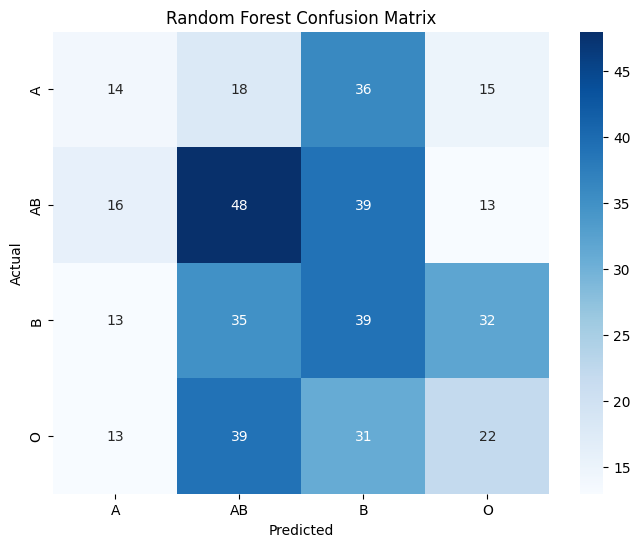

In [7]:
# %%
# Classifier 1: Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest F1 Score: {rf_f1:.4f}")

# Confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_, 
            yticklabels=target_encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM Accuracy: 0.2624
SVM F1 Score: 0.2422


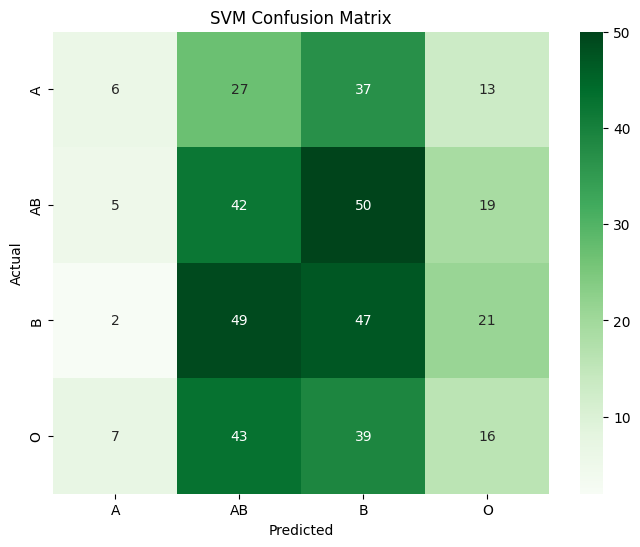

In [8]:
# %%
# Classifier 2: Support Vector Machine
svm_clf = SVC(kernel='linear', random_state=42, probability=True)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM F1 Score: {svm_f1:.4f}")

# Confusion matrix
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=target_encoder.classes_, 
            yticklabels=target_encoder.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Naive Bayes Accuracy: 0.3121
Naive Bayes F1 Score: 0.3085


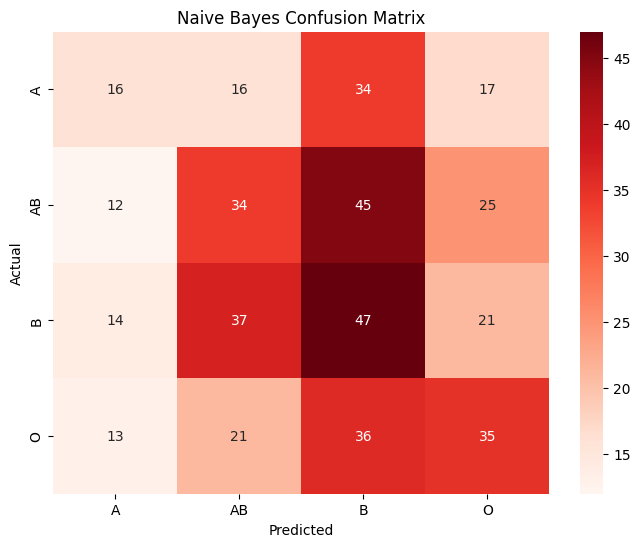

In [9]:
# %%
# Classifier 3: Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred, average='weighted')

print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes F1 Score: {nb_f1:.4f}")

# Confusion matrix
nb_cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=target_encoder.classes_, 
            yticklabels=target_encoder.classes_)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# %%
# Compare model performance
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Naive Bayes'],
    'Accuracy': [rf_accuracy, svm_accuracy, nb_accuracy],
    'F1 Score': [rf_f1, svm_f1, nb_f1]
})

print("\nModel Comparison:")
print(results)


Model Comparison:
           Model  Accuracy  F1 Score
0  Random Forest  0.290780  0.283887
1            SVM  0.262411  0.242235
2    Naive Bayes  0.312057  0.308452


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score

# Define the model and parameter grid
gnb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(-12, -3, 10)
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best model
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(X_test)

# Evaluate accuracy
gnb_accuracy = accuracy_score(y_test, y_pred)
print(f"Best var_smoothing: {grid_search.best_params_['var_smoothing']}")
print(f"Naive Bayes accuracy (tuned): {gnb_accuracy:.4f}")


Best var_smoothing: 0.001
Naive Bayes accuracy (tuned): 0.3097
